In [36]:
pip install rdkit-pypi

Note: you may need to restart the kernel to use updated packages.


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import chain
%matplotlib inline

In [38]:
from rdkit import Chem
from rdkit import rdBase
from rdkit.Chem import PandasTools
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole 
from sklearn.model_selection import train_test_split

In [39]:
import warnings
warnings.filterwarnings('ignore')

# Search for compouds similar to kinase inhibitors in the ChEBI database

In [56]:
#Load active kinase inhibitors
kinase_inhibitors = pd.read_csv('active_CDK9_compounds.csv')
kinase_inhibitors.sort_values("standard_value", inplace=True)
kinase_inhibitors.head()

,Unnamed: 0,molecule_chembl_id,canonical_smiles,standard_value,MW,LogP,NumHDonors,NumHAcceptors,standard_norm,pIC50
139,510,CHEMBL4217448,COc1ccc(F)c(F)c1-c1ccnc(Nc2ccc(S(=O)(=O)Nc3nnc...,0.4,490.517,4.13472,2,9,0.4,9.397940
247,783,CHEMBL4786559,COC[C@H](C)N[C@H]1CC[C@H](Nc2cc(-c3cccc(NCC4(C...,0.5,513.086,4.87688,3,8,0.5,9.301030
299,1134,CHEMBL4785212,CCC(=O)c1c(N2CCOCC2)c2ccc(Nc3ncc(F)c(-c4ccc(F)...,0.7,522.508,4.70970,1,9,0.7,9.154902
127,494,CHEMBL4209151,COc1cccc(F)c1-c1ccnc(Nc2ccc(S(=O)(=O)Nc3onc(C)...,1.0,469.498,4.44054,2,8,1.0,9.000000
41,286,CHEMBL3977324,O=C(Nc1cc(-c2ccc(F)c(NCC3CCOCC3)n2)c(Cl)cn1)[C...,1.0,447.942,3.71270,3,6,1.0,9.000000


In [57]:
#converts smiles to molecules and add molecule column to dataframe
PandasTools.AddMoleculeColumnToFrame(kinase_inhibitors, 'canonical_smiles', 'Molecule', includeFingerprints=True)
kinase_inhibitors.head()

,Unnamed: 0,molecule_chembl_id,canonical_smiles,standard_value,MW,LogP,NumHDonors,NumHAcceptors,standard_norm,pIC50,Molecule
139,510,CHEMBL4217448,COc1ccc(F)c(F)c1-c1ccnc(Nc2ccc(S(=O)(=O)Nc3nnc...,0.4,490.517,4.13472,2,9,0.4,9.397940,<rdkit.Chem.rdchem.Mol object at 0x2da855c40>
247,783,CHEMBL4786559,COC[C@H](C)N[C@H]1CC[C@H](Nc2cc(-c3cccc(NCC4(C...,0.5,513.086,4.87688,3,8,0.5,9.301030,<rdkit.Chem.rdchem.Mol object at 0x2da827ae0>
299,1134,CHEMBL4785212,CCC(=O)c1c(N2CCOCC2)c2ccc(Nc3ncc(F)c(-c4ccc(F)...,0.7,522.508,4.70970,1,9,0.7,9.154902,<rdkit.Chem.rdchem.Mol object at 0x2da8558c0>
127,494,CHEMBL4209151,COc1cccc(F)c1-c1ccnc(Nc2ccc(S(=O)(=O)Nc3onc(C)...,1.0,469.498,4.44054,2,8,1.0,9.000000,<rdkit.Chem.rdchem.Mol object at 0x2da8557e0>
41,286,CHEMBL3977324,O=C(Nc1cc(-c2ccc(F)c(NCC3CCOCC3)n2)c(Cl)cn1)[C...,1.0,447.942,3.71270,3,6,1.0,9.000000,<rdkit.Chem.rdchem.Mol object at 0x2da855af0>


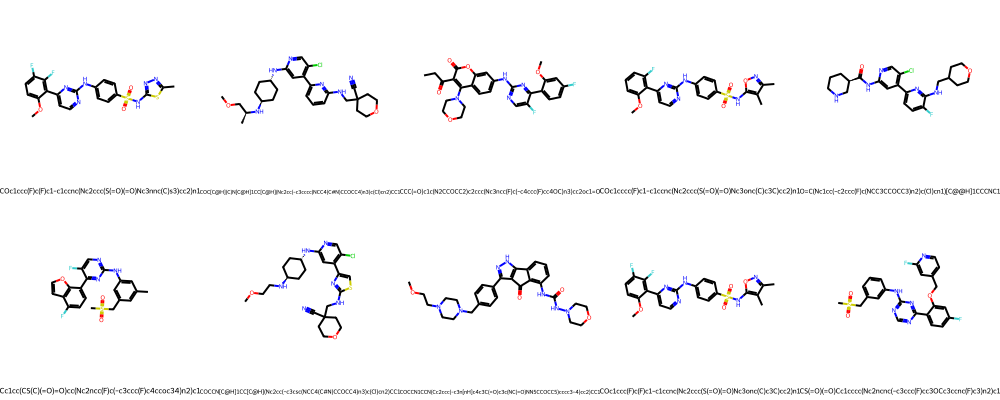

In [61]:
PandasTools.FrameToGridImage(kinase_inhibitors.head(10), column="Molecule", legendsCol="canonical_smiles", molsPerRow=5)

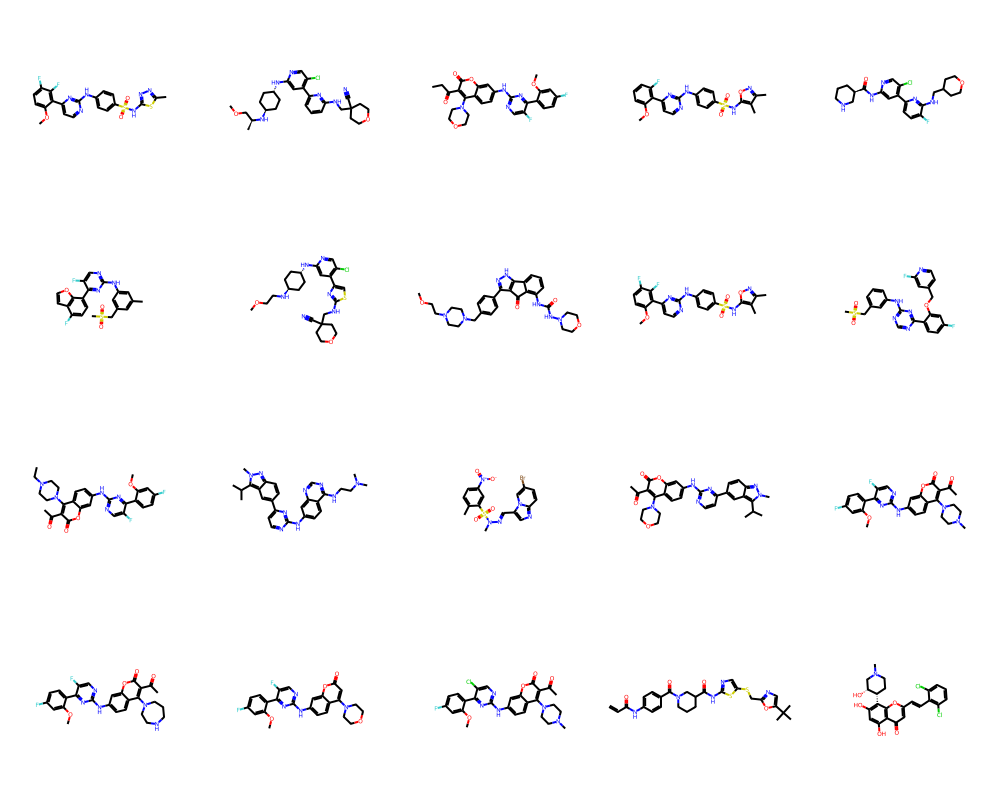

In [58]:
mols=kinase_inhibitors['Molecule'][0:20]
Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200, 200))

In [67]:
bki=kinase_inhibitors['Molecule'][139]

In [66]:
bki_smi =kinase_inhibitors['canonical_smiles'][139]

# Find similar compounds

Morgan Fingerprint was used to rank acids by similarity to bki.

In [69]:

ChEBI_df = PandasTools.LoadSDF('ChEBI_complete.sdf', smilesName='SMILES', molColName='Molecule',
           includeFingerprints=True, removeHs=False, strictParsing=True)

ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
[09:33:08] Warning: molecule is tagged as 3D, but all Z coords are zero
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    4 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: b

ReadProperties: found unknown property
ReadProperties: buffer = 'M  SPA   1  5  18  19  20  21  31'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    4 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   41 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   28 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   85 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   40 *'
ReadProperties: found un

ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   28 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   54 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: found unknown property
ReadProperties

ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   34 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   18 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   38 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   42 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   58 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   62 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SST  1   

[09:33:15] Explicit valence for atom # 12 N, 4, is greater than permitted
ReadProperties: value line ignored
ReadProperties: buffer = 'V  103 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    4 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    5 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   20 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   19 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   20 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   20 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: found unknown property
ReadPropert

ReadProperties: value line ignored
ReadProperties: buffer = 'V    4 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   20 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   20 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    4 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   34 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   30 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   27 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   31 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    4 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadPr

ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   35 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   37 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   15 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   34 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   36 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    5 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    4 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    5 *'
ReadProperties: v

ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   34 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   36 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   25 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   35 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: found unknown property
ReadProperties: b

ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   35 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   37 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   35 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   37 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: v

ReadProperties: value line ignored
ReadProperties: buffer = 'V   76 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   36 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   19 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    4 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    4 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    4 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   20 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   19 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   

ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    2 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    5 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    2 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
[09:33:28] Explicit valence for atom # 6 Te, 8, is greater than permitted
[09:33:28] ERROR: Could not sanitize molecule ending on line 6758301
[09:33:28] ERROR: Explicit valence for atom # 6 Te, 8, is greater than permitted
[09:33:28] Explicit valence for atom # 1 H, 3, is greater than permitted
[09:33:28] ERROR: Could not sanitize molecule ending on line 6759228
[09:33:28] ERROR: Explicit valence for atom # 1 H, 3, is greater than permitted
[09:33:28] Explicit valence for atom # 0 Be, 6, is greater than permitted
[09:33:28] ERROR: Could not sanitize molecule ending on line 6760998
[09:33:28] ERROR: Explicit valence for atom # 0 Be, 6, is greater than permitted
ReadProperties: value line ignored
ReadPropert

ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   20 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   15 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   59 *'
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   15 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadPr

[09:33:31] Explicit valence for atom # 3 Br, 2, is greater than permitted
[09:33:31] ERROR: Could not sanitize molecule ending on line 7290845
[09:33:31] ERROR: Explicit valence for atom # 3 Br, 2, is greater than permitted
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    5 *'
[09:33:31] 

****
Post-condition Violation
Element '' not found
Violation occurred on line 93 in file /Users/runner/work/rdkit-pypi/rdkit-pypi/build/temp.macosx-11.0-arm64-cpython-310/rdkit/Code/GraphMol/PeriodicTable.h
Failed Expression: anum > -1
****

[09:33:31] ERROR: Element '' not found
[09:33:31] ERROR: moving to the beginning of the next molecule
[09:33:31] 

****
Post-condition Violation
Element '' not found
Violation occurred on line 93 in file /Users/runner/work/rdkit-pypi/rdkit-pypi/build/temp.macosx-11.0-arm64-cpython-310/rdkit/Code/GraphMol/Pe

[09:33:33] Explicit valence for atom # 11 Al, 10, is greater than permitted
[09:33:33] ERROR: Could not sanitize molecule ending on line 7561279
[09:33:33] ERROR: Explicit valence for atom # 11 Al, 10, is greater than permitted
[09:33:33] Explicit valence for atom # 11 Al, 10, is greater than permitted
[09:33:33] ERROR: Could not sanitize molecule ending on line 7561382
[09:33:33] ERROR: Explicit valence for atom # 11 Al, 10, is greater than permitted
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    5 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperti

ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
[09:33:34] Explicit valence for atom # 5 Bi, 9, is greater than permitted
[09:33:34] ERROR: Could not sanitize molecule ending on line 7627900
[09:33:34] ERROR: Explicit valence for atom # 5 Bi, 9, is greater than permitted
ReadProperties: value line ignored
ReadProperties: buffer = 'V    4 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    5 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   30 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   31 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   33 *'
ReadProperties: value line ignored
ReadProperties: buf

ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
[09:33:35] Warning: molecule is tagged as 3D, but all Z coords are zero
ReadP

ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   25 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   24 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    5 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    2 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    5 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V    5 *'
[09:33:38] Explicit valence for atom # 9 N, 4, is greater than permitted
[09:33:38] ERROR: Could not sanitize molecule ending on line 8200059
[09:33:38] ERROR: Explicit valence for atom # 9 N, 4, is greater than permitted
[09:33:38] Explicit valence for atom # 8 N, 4, is greater than permitted
[09:33:38] ERROR: Could not sanitize molecule ending on line 8200211
[09:33:38] ERROR: Explicit valence for atom # 8 N, 4, is greater than permitted
[09:33:38] Explicit valence for atom # 12 N, 4, is greater than permitted
[09:33:38] ERROR: Could not sanitize molecule ending on line 8200422
[09:33:38] ERROR: Explicit valence for atom # 12 N, 4, is greater than permitted
[09:33:38] Explicit valence for atom # 12 N, 4, is greater than permitted
[09:33:38] ERROR: Could not sanitize molecule ending on line 8200580
[09:33:38] ERROR: Explicit valence for atom # 12 N, 4, is greater than permitted
[09:33:38] Explicit valence for atom 

ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    5 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    5 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   15 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   18 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V    5 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   24 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   20 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadPr

ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   42 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   43 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   15 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    4 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: v

ReadProperties: buffer = 'V    9 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  3   1 HT    2 HT    3 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   15 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   15 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value li

ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    4 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   27 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ig

ReadProperties: found unknown property
ReadProperties: buffer = 'M  SST  2   1 RAN   2 RAN'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  2   1 HT    2 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   46 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   64 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   77 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   67 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   68 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   28 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'


ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    2 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   53 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   18 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   19 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   24 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   25 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadProperties: value line ignored
ReadProperties: bu

ReadProperties: value line ignored
ReadProperties: buffer = 'V  106 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V  107 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V  125 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V  126 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V  114 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V  126 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V  103 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V  126 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    5 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V  114 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V  115 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V  103 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V  115 *'
ReadPr

ReadProperties: buffer = 'V    4 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    5 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    5 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   18 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    4 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   18 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   25 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   15 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   28 *'
ReadProperties: value line ignored
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   30 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   31 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    5 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   28 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   18 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   18 *'
ReadPr

ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   28 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   31 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   24 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   31 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   18 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   19 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   20 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   33 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   33 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   33 *'
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   19 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   19 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   19 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   19 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   19 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   19 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   19 *'
ReadPr

ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   19 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadPr

ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   34 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   34 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   34 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   34 *'
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V   35 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   37 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    4 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   18 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   18 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   18 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   18 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   18 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V   20 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   25 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   24 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   24 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   24 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   20 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   25 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   20 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   19 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   19 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   27 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadPr

[09:34:08] 

****
Post-condition Violation
Element 'ACP' not found
Violation occurred on line 93 in file /Users/runner/work/rdkit-pypi/rdkit-pypi/build/temp.macosx-11.0-arm64-cpython-310/rdkit/Code/GraphMol/PeriodicTable.h
Failed Expression: anum > -1
****

[09:34:08] ERROR: Element 'ACP' not found
[09:34:08] ERROR: moving to the beginning of the next molecule
[09:34:08] 

****
Post-condition Violation
Element 'ACP' not found
Violation occurred on line 93 in file /Users/runner/work/rdkit-pypi/rdkit-pypi/build/temp.macosx-11.0-arm64-cpython-310/rdkit/Code/GraphMol/PeriodicTable.h
Failed Expression: anum > -1
****

[09:34:08] ERROR: Element 'ACP' not found
[09:34:08] ERROR: moving to the beginning of the next molecule
[09:34:08] 

****
Post-condition Violation
Element 'ACP' not found
Violation occurred on line 93 in file /Users/runner/work/rdkit-pypi/rdkit-pypi/build/temp.macosx-11.0-arm64-cpython-310/rdkit/Code/GraphMol/PeriodicTable.h
Failed Expression: anum > -1
****

[09:34:08] ERROR

ReadProperties: value line ignored
ReadProperties: buffer = 'V   25 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   25 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   25 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   25 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   33 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   19 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   20 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   33 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   33 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   33 *'
ReadPr

ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    4 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    5 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadProperties: value line ignored
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   34 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadPr

ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SPA   1  1  21'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   33 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   34 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SPA   1  1  17'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    4 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line 

ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   46 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  2   1 HT    2 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   46 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  2   1 HT    2 HT'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SPA   1  5  66  67  68  69  70'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SPA   1  5  66  67  68  69  70'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
Re

ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
[09:34:17] Explicit valence for atom # 12 N, 4, is greater than permitted
[09:34:17] ERROR: Could not sanitize molecule ending on line 12458752
[09:34:17] ERROR: Explicit valence for atom # 12 N, 4, is greater than permitted
[09:34:17] Explicit valence for atom # 12 N, 4, is greater than permitted
[09:34:17] ERROR: Could not sanitize molecule ending on line 12458934
[09:34:17] ERROR: Explicit valence for atom # 12 N, 4, is greater than permitted
[09:34:17] Warning: molecule is tagged as 3D, but all Z coords are zero
ReadProperties: value line ignored
ReadProperties: buffer = 'V   24 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
ReadProperties: value line ignored
ReadProperties: b

ReadProperties: value line ignored
ReadProperties: buffer = 'V    5 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   41 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
[09:34:18] Warning: molecule is tagged as 3D, but all Z coords are zero
[09:34:18] Warning: molecule is tagged as 3D, but all Z coords are zero
[09:34:18] Warning: molecule is tagged as 3D, but all Z coords are zero
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    2 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
Rea

ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    5 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   25 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   24 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   19 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   48 *'
ReadProperties: value line ignore

ReadProperties: buffer = 'V   18 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   18 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   18 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    4 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    4 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: v

ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   53 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   53 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   33 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   18 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadPr

ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadPr

ReadProperties: buffer = 'V   29 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadPr

[09:34:24] Warning: conflicting stereochemistry at atom 12 ignored. by rule 1a.
[09:34:24] Warning: conflicting stereochemistry at atom 12 ignored. by rule 1a.
ReadProperties: value line ignored
ReadProperties: buffer = 'V    5 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   20 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    2 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   15 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   39 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   43 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   33 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   33 *'
ReadProperties: value line ignored
ReadProperties: buffer =

ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   24 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   61 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   64 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   33 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   34 *'
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   30 *'
[09:35:27] Warning: molecule is tagged as 3D, but all Z coords are zero
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadP

ReadProperties: value line ignored
ReadProperties: buffer = 'V   15 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   15 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   15 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   15 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   15 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V  121 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V  100 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   27 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   31 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   41 *'
ReadPr

ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  2   1 HT    2 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   20 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   24 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   25 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   27 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   28 *'
ReadProperties: value

ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   56 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   57 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   58 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   15 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   

ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadP

ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   15 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V   19 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   20 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   54 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   54 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   52 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   31 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   31 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   25 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   33 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   36 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   25 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   20 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   20 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   55 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   33 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   33 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   37 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   42 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    2 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    2 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   15 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   27 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    2 *'
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ig

ReadProperties: value line ignored
ReadProperties: buffer = 'V   19 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   24 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   25 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   27 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   15 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   19 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   24 *'
ReadPr

ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   25 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   25 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   34 *'
ReadProperties: value line ignored
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V   30 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   33 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   31 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   33 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   31 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   33 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   45 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   47 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   45 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   47 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SPA   1 10  13  14  15  16  17  18  19  20  21  22'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SPA   2  1  23'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   37 *'
ReadProperties:

ReadProperties: buffer = 'V   33 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   20 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   37 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   20 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   25 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   25 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadP

ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   15 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    2 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   35 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   86 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadProperties: value line ig

ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   25 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   34 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   34 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   34 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   34 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   34 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   34 *'
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V   90 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   90 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   90 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   90 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   62 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   62 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   62 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   33 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   33 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   33 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   43 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   43 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   43 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   43 *'
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    2 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    2 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    2 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    2 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    2 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    2 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadPr

ReadProperties: buffer = 'V    4 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    4 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: found unknown property
Re

ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   18 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   19 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   18 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   19 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    4 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    4 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    4 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    5 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   46 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   61 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V   37 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   18 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V   69 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   80 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   81 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   87 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   24 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   65 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   66 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   67 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   68 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   69 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   80 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   81 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   87 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V   84 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   88 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   91 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   91 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   52 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   56 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   57 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   57 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   58 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   68 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V   28 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   35 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   35 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   35 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   35 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   28 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    4 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V   37 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   19 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   39 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   20 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   40 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   19 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   39 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   25 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   37 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   70 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   71 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   72 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   73 *'
ReadPr

ReadProperties: value line ignored
ReadProperties: buffer = 'V   20 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   21 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    2 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    2 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   11 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadPr

[09:36:11] Explicit valence for atom # 8 N, 4, is greater than permitted
ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    4 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    4 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    4 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    6 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   16 *'
Read

ReadProperties: value line ignored
ReadProperties: buffer = 'V   56 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   48 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   98 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   99 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   25 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   15 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   25 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   94 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V  143 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   

[09:36:25] Warning: molecule is tagged as 3D, but all Z coords are zero
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    2 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    2 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   24 *'
ReadProperties: value line ignored
ReadProperties: b

ReadProperties: value line ignored
ReadProperties: buffer = 'V   15 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   15 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   15 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   15 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   15 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadPr

ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   18 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   19 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   19 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   19 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   19 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   19 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadPr

ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   18 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   18 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   22 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   13 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadPr

[09:36:39] Warning: molecule is tagged as 3D, but all Z coords are zero
ReadProperties: value line ignored
ReadProperties: buffer = 'V   17 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   42 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   49 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    3 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    4 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   32 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   42 *'
ReadP

ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   51 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   24 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    7 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    9 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   15 *'
ReadProperties: found unknown property
ReadProperties: buffer = 'M  SCN  1   1 HT'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   48 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   50 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   58 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   

ReadProperties: value line ignored
ReadProperties: buffer = 'V   12 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    1 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   14 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   23 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   24 *'
[09:37:01] Warning: molecule is tagged as 3D, but all Z coords are zero
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   18 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   18 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   18 *'
ReadP

ReadProperties: value line ignored
ReadProperties: buffer = 'V    5 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   55 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   57 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   52 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   46 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   47 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   35 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   35 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   35 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   35 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   35 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   35 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   35 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   35 *'
ReadPr

[09:37:07] Warning: molecule is tagged as 3D, but all Z coords are zero
ReadProperties: value line ignored
ReadProperties: buffer = 'V   34 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   37 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    8 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   10 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    5 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V    5 *'
[09:37:08] Warning: molecule is tagged as 3D, but all Z coords are zero
ReadProperties: value line ignored
ReadProperties: buffer = 'V   51 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V  102 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   51 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   50 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   26 *'
ReadProperties: value line ignored
ReadProperties: buffer = 'V   29 *'
Read

In [71]:
ChEBI_df.head()

,ChEBI ID,ChEBI Name,Star,Definition,Secondary ChEBI ID,InChI,InChIKey,SMILES,Formulae,Charge,...,GlyGen Database Links,GlyTouCan Database Links,LIPID MAPS class Database Links,RESID Database Links,WebElements Database Links,FAO/WHO standards Database Links,PPR Links,CiteXplore citation Links,SMID Database Links,ChemIDplus Database Links
0,CHEBI:90,(-)-epicatechin,3,"A catechin with (2R,3R)-configuration.",CHEBI:18484,InChI=1S/C15H14O6/c16-8-4-11(18)9-6-13(20)15(2...,PFTAWBLQPZVEMU-UKRRQHHQSA-N,[H][C@]1(c2ccc(O)c(O)c2)Oc2cc(O)cc(O)c2C[C@H]1O,C15H14O6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CHEBI:165,"(1S,4R)-fenchone",3,"A fenchone that has 1S,4R stereochemistry. A c...",CHEBI:63901,"InChI=1S/C10H16O/c1-9(2)7-4-5-10(3,6-7)8(9)11/...",LHXDLQBQYFFVNW-XCBNKYQSSA-N,CC1(C)C(=O)[C@@]2(C)CC[C@@H]1C2,C10H16O,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CHEBI:598,1-alkyl-2-acylglycerol,3,A glycerol ether having an alkyl substituent a...,CHEBI:19009,NaN,NaN,*C(=O)OC(CO)CO[1*],C4H6O4R2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CHEBI:776,16alpha-hydroxyestrone,3,The 16alpha-hydroxy derivative of estrone; a m...,CHEBI:60497,InChI=1S/C18H22O3/c1-18-7-6-13-12-5-3-11(19)8-...,WPOCIZJTELRQMF-QFXBJFAPSA-N,[H][C@@]12C[C@@H](O)C(=O)[C@@]1(C)CC[C@]1([H])...,C18H22O3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CHEBI:943,"2,6-dichlorobenzonitrile",3,A nitrile that is benzonitrile which is substi...,CHEBI:73174,InChI=1S/C7H3Cl2N/c8-6-2-1-3-7(9)5(6)4-10/h1-3H,YOYAIZYFCNQIRF-UHFFFAOYSA-N,N#Cc1c(Cl)cccc1Cl,C7H3Cl2N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
df = ChEBI_df[['SMILES']]

In [73]:
df.shape

(150899, 1)

In [74]:
df

,SMILES
0,[H][C@]1(c2ccc(O)c(O)c2)Oc2cc(O)cc(O)c2C[C@H]1O
1,CC1(C)C(=O)[C@@]2(C)CC[C@@H]1C2
2,*C(=O)OC(CO)CO[1*]
3,[H][C@@]12C[C@@H](O)C(=O)[C@@]1(C)CC[C@]1([H])...
4,N#Cc1c(Cl)cccc1Cl
...,...
151157,[H][C@@]12CCC3=CC(=O)C=C[C@]3(C)[C@@]1(F)[C@@H...
151158,Cn1c(=O)c2c([nH]c(=O)n2C)n(C)c1=O
151159,COC(=O)CCC(=O)CN
151160,CCC(C(=O)O)C(=O)O


In [75]:
#converts smiles to molecules and add molecule column to dataframe
PandasTools.AddMoleculeColumnToFrame(df, 'SMILES', 'Molecule', includeFingerprints=True)
df.head()

[09:39:31] WARNING: not removing hydrogen atom without neighbors
[09:39:31] WARNING: not removing hydrogen atom with dummy atom neighbors
[09:39:31] WARNING: not removing hydrogen atom with dummy atom neighbors
[09:39:31] WARNING: not removing hydrogen atom with dummy atom neighbors
[09:39:33] WARNING: not removing hydrogen atom without neighbors
[09:39:33] WARNING: not removing hydrogen atom without neighbors
[09:39:33] WARNING: not removing hydrogen atom without neighbors
[09:39:33] WARNING: not removing hydrogen atom without neighbors
[09:39:33] WARNING: not removing hydrogen atom without neighbors
[09:39:34] WARNING: not removing hydrogen atom without neighbors
[09:39:34] WARNING: not removing hydrogen atom without neighbors
[09:39:34] WARNING: not removing hydrogen atom without neighbors
[09:39:34] WARNING: not removing hydrogen atom without neighbors
[09:39:34] WARNING: not removing hydrogen atom without neighbors
[09:39:34] WARNING: not removing hydrogen atom without neighbors
[

[09:39:38] WARNING: not removing hydrogen atom without neighbors
[09:39:38] WARNING: not removing hydrogen atom without neighbors
[09:39:39] WARNING: not removing hydrogen atom with dummy atom neighbors
[09:39:39] WARNING: not removing hydrogen atom without neighbors
[09:39:39] WARNING: not removing hydrogen atom without neighbors
[09:39:39] WARNING: not removing hydrogen atom without neighbors
[09:39:39] WARNING: not removing hydrogen atom without neighbors
[09:39:39] WARNING: not removing hydrogen atom without neighbors
[09:39:39] WARNING: not removing hydrogen atom without neighbors
[09:39:39] WARNING: not removing hydrogen atom without neighbors
[09:39:39] WARNING: not removing hydrogen atom without neighbors
[09:39:39] WARNING: not removing hydrogen atom without neighbors
[09:39:39] WARNING: not removing hydrogen atom without neighbors
[09:39:39] WARNING: not removing hydrogen atom without neighbors
[09:39:39] WARNING: not removing hydrogen atom without neighbors
[09:39:39] WARNIN

[09:43:32] Explicit valence for atom # 28 N, 4, is greater than permitted
[09:43:35] WARNING: not removing hydrogen atom without neighbors
[09:43:35] WARNING: not removing hydrogen atom without neighbors


,SMILES,Molecule
0,[H][C@]1(c2ccc(O)c(O)c2)Oc2cc(O)cc(O)c2C[C@H]1O,<rdkit.Chem.rdchem.Mol object at 0x3b97b1f50>
1,CC1(C)C(=O)[C@@]2(C)CC[C@@H]1C2,<rdkit.Chem.rdchem.Mol object at 0x3b97b1fc0>
2,*C(=O)OC(CO)CO[1*],<rdkit.Chem.rdchem.Mol object at 0x3b97b19a0>
3,[H][C@@]12C[C@@H](O)C(=O)[C@@]1(C)CC[C@]1([H])...,<rdkit.Chem.rdchem.Mol object at 0x3b97b1d20>
4,N#Cc1c(Cl)cccc1Cl,<rdkit.Chem.rdchem.Mol object at 0x3b97b1a10>


In [77]:
df["Molecule"]

0         <rdkit.Chem.rdchem.Mol object at 0x3b97b1f50>
1         <rdkit.Chem.rdchem.Mol object at 0x3b97b1fc0>
2         <rdkit.Chem.rdchem.Mol object at 0x3b97b19a0>
3         <rdkit.Chem.rdchem.Mol object at 0x3b97b1d20>
4         <rdkit.Chem.rdchem.Mol object at 0x3b97b1a10>
                              ...                      
151157    <rdkit.Chem.rdchem.Mol object at 0x3e0dcceb0>
151158    <rdkit.Chem.rdchem.Mol object at 0x3e0dccf90>
151159    <rdkit.Chem.rdchem.Mol object at 0x3e0dcd070>
151160    <rdkit.Chem.rdchem.Mol object at 0x3e0dcd150>
151161    <rdkit.Chem.rdchem.Mol object at 0x3e0dcd230>
Name: Molecule, Length: 150899, dtype: object

In [83]:
bki_fp = np.array(AllChem.GetMorganFingerprintAsBitVect(bki,3,nBits=1024))


#similarity for ChEBI molecules
similar_compounds = []
for mol in df["Molecule"]:
    try:
        cpd_fp = np.array(AllChem.GetMorganFingerprintAsBitVect(mol,3,nBits=1024))
        sim = np.sum(bki_fp*cpd_fp) / np.sqrt( np.sum(bki_fp)*np.sum(cpd_fp) )
        mol_smiles = Chem.MolToSmiles(mol, isomericSmiles=True)
        similar_compounds.append([mol_smiles, sim])
    except:
        continue
    
#sort by similarity
similar_compounds.sort(key=lambda x:x[1], reverse=True)

# Filter CHeBL df

In [86]:
#Select 20 most similar
most_similar_compounds = similar_compounds[:20]

In [87]:
most_similar_compounds

[['Cc1nnc(NS(=O)(=O)c2ccc(N)cc2)s1', 0.5983211225424633],
 ['Cc1ncc(-c2ccnc(Nc3ccc(S(C)(=O)=O)cc3)n2)n1C(C)C', 0.4969995442739832],
 ['CCc1nnc(NS(=O)(=O)c2ccc(N)cc2)s1', 0.47261170463904445],
 ['CC(C)(C)c1nnc(NS(=O)(=O)c2ccc(N)cc2)s1', 0.46621069810423016],
 ['COc1ccc(Nc2ccnc(Nc3ccc(OC)cc3)n2)cc1', 0.45425676257949793],
 ['Cc1csc(NS(=O)(=O)c2ccc(N)cc2)n1', 0.4420799098060879],
 ['CCc1nnc(NS(=O)(=O)c2ccc(NC(=S)NC(=O)c3ccccc3)cc2)s1', 0.43619243739174973],
 ['CC(=O)Nc1ccc(S(=O)(=O)Nc2nccs2)cc1', 0.4267429637493243],
 ['Cc1ccnc(NS(=O)(=O)c2ccc(N)cc2)n1', 0.4267429637493243],
 ['O=C(NN1CCC(N2CCCC2)CC1)c1ccc(Nc2nccc(-c3cc4ccccc4s3)n2)cc1',
  0.424874940425384],
 ['COc1ccc(S(=O)(=O)NN)cc1', 0.42051713353118003],
 ['COc1ccc(-c2csc(Nc3ccc(S(N)(=O)=O)cc3)n2)cc1', 0.41993157228187683],
 ['COc1ccccc1Oc1ccc(S(=O)(=O)Nc2cccnc2)cc1', 0.4199265192881244],
 ['CCOc1ccccc1C(=O)Nc1ccc(S(=O)(=O)Nc2nccc(C)n2)cc1', 0.41953227051959424],
 ['COc1ccc(NS(=O)(=O)c2ccc(N)cc2)nn1', 0.4193139346887673],
 ['COc1ccc(

In [89]:
df = pd.DataFrame(most_similar_compounds, columns=['SMILES','similarity'])
PandasTools.AddMoleculeColumnToFrame(df, 'SMILES', 'Molecule', includeFingerprints=True)
df.head()

,SMILES,similarity,Molecule
0,Cc1nnc(NS(=O)(=O)c2ccc(N)cc2)s1,0.598321,<rdkit.Chem.rdchem.Mol object at 0x3b0d71d20>
1,Cc1ncc(-c2ccnc(Nc3ccc(S(C)(=O)=O)cc3)n2)n1C(C)C,0.497000,<rdkit.Chem.rdchem.Mol object at 0x3b0d729d0>
2,CCc1nnc(NS(=O)(=O)c2ccc(N)cc2)s1,0.472612,<rdkit.Chem.rdchem.Mol object at 0x3b0d72ab0>
3,CC(C)(C)c1nnc(NS(=O)(=O)c2ccc(N)cc2)s1,0.466211,<rdkit.Chem.rdchem.Mol object at 0x3b0d72b90>
4,COc1ccc(Nc2ccnc(Nc3ccc(OC)cc3)n2)cc1,0.454257,<rdkit.Chem.rdchem.Mol object at 0x3b0d72c70>


# Calculate molecular descriptors

In [90]:
df["MolWt"] = df["Molecule"].map(lambda x: Descriptors.MolWt(x))
df["LogP"] = df["Molecule"].map(lambda x: Descriptors.MolLogP(x))
df["n_RotatableBonds"] = df["Molecule"].map(lambda x: Descriptors.NumRotatableBonds(x))
df.head()

,SMILES,similarity,Molecule,MolWt,LogP,n_RotatableBonds
0,Cc1nnc(NS(=O)(=O)c2ccc(N)cc2)s1,0.598321,<rdkit.Chem.rdchem.Mol object at 0x3b0d71d20>,270.339,1.22952,3
1,Cc1ncc(-c2ccnc(Nc3ccc(S(C)(=O)=O)cc3)n2)n1C(C)C,0.497000,<rdkit.Chem.rdchem.Mol object at 0x3b0d729d0>,371.466,3.37652,5
2,CCc1nnc(NS(=O)(=O)c2ccc(N)cc2)s1,0.472612,<rdkit.Chem.rdchem.Mol object at 0x3b0d72ab0>,284.366,1.48350,4
3,CC(C)(C)c1nnc(NS(=O)(=O)c2ccc(N)cc2)s1,0.466211,<rdkit.Chem.rdchem.Mol object at 0x3b0d72b90>,312.420,2.21860,3
4,COc1ccc(Nc2ccnc(Nc3ccc(OC)cc3)n2)cc1,0.454257,<rdkit.Chem.rdchem.Mol object at 0x3b0d72c70>,322.368,3.98100,6


# Calculating the aromatic proportion

In [91]:
df["n_Atoms"] = df["Molecule"].map(lambda x: x.GetNumAtoms())
df["n_AromaticAtoms"] = df["Molecule"].map(lambda x: len(x.GetAromaticAtoms()))
df["AromaticProportion"] = df["n_AromaticAtoms"]/df["n_Atoms"]
df.head(5)

,SMILES,similarity,Molecule,MolWt,LogP,n_RotatableBonds,n_Atoms,n_AromaticAtoms,AromaticProportion
0,Cc1nnc(NS(=O)(=O)c2ccc(N)cc2)s1,0.598321,<rdkit.Chem.rdchem.Mol object at 0x3b0d71d20>,270.339,1.22952,3,17,11,0.647059
1,Cc1ncc(-c2ccnc(Nc3ccc(S(C)(=O)=O)cc3)n2)n1C(C)C,0.497000,<rdkit.Chem.rdchem.Mol object at 0x3b0d729d0>,371.466,3.37652,5,26,17,0.653846
2,CCc1nnc(NS(=O)(=O)c2ccc(N)cc2)s1,0.472612,<rdkit.Chem.rdchem.Mol object at 0x3b0d72ab0>,284.366,1.48350,4,18,11,0.611111
3,CC(C)(C)c1nnc(NS(=O)(=O)c2ccc(N)cc2)s1,0.466211,<rdkit.Chem.rdchem.Mol object at 0x3b0d72b90>,312.420,2.21860,3,20,11,0.550000
4,COc1ccc(Nc2ccnc(Nc3ccc(OC)cc3)n2)cc1,0.454257,<rdkit.Chem.rdchem.Mol object at 0x3b0d72c70>,322.368,3.98100,6,24,18,0.750000


,SMILES,similarity,Molecule,MolWt,LogP,n_RotatableBonds,n_Atoms,n_AromaticAtoms,AromaticProportion
0,Cc1nnc(NS(=O)(=O)c2ccc(N)cc2)s1,0.598321,,270.339,1.22952,3,17,11,0.647059
1,Cc1ncc(-c2ccnc(Nc3ccc(S(C)(=O)=O)cc3)n2)n1C(C)C,0.497000,,371.466,3.37652,5,26,17,0.653846
2,CCc1nnc(NS(=O)(=O)c2ccc(N)cc2)s1,0.472612,,284.366,1.48350,4,18,11,0.611111
3,CC(C)(C)c1nnc(NS(=O)(=O)c2ccc(N)cc2)s1,0.466211,,312.420,2.21860,3,20,11,0.550000
4,COc1ccc(Nc2ccnc(Nc3ccc(OC)cc3)n2)cc1,0.454257,,322.368,3.98100,6,24,18,0.750000
5,Cc1csc(NS(=O)(=O)c2ccc(N)cc2)n1,0.442080,,269.351,1.83452,3,17,11,0.647059
6,CCc1nnc(NS(=O)(=O)c2ccc(NC(=S)NC(=O)c3ccccc3)c...,0.436192,,447.567,3.02810,6,29,17,0.586207
7,CC(=O)Nc1ccc(S(=O)(=O)Nc2nccs2)cc1,0.426743,,297.361,1.90230,4,19,11,0.578947
8,Cc1ccnc(NS(=O)(=O)c2ccc(N)cc2)n1,0.426743,,264.310,1.16802,3,18,12,0.666667
9,O=C(NN1CCC(N2CCCC2)CC1)c1ccc(Nc2nccc(-c3cc4ccc...,0.424875,,498.656,5.30690,6,36,21,0.583333

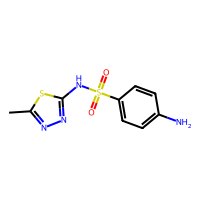
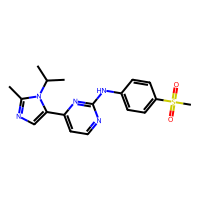
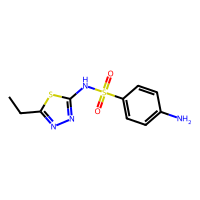
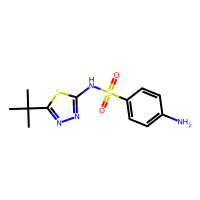
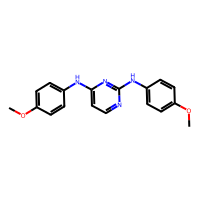
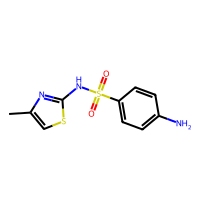
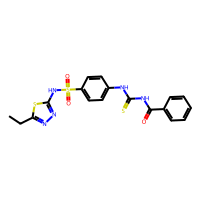
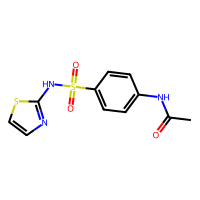
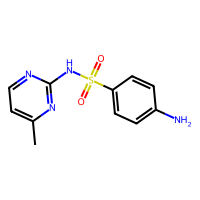
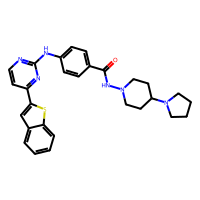
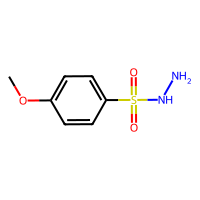
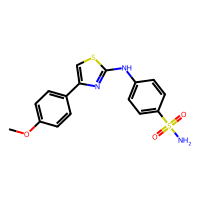
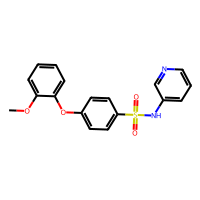
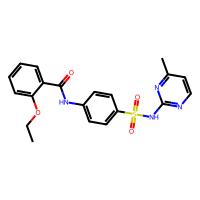
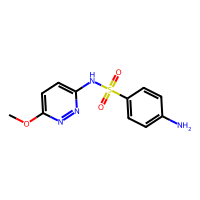
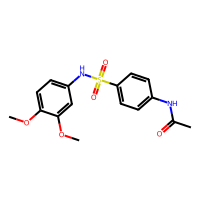
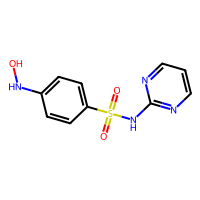
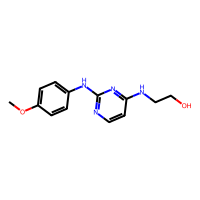
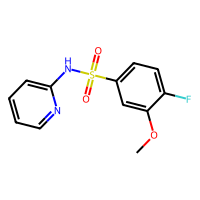
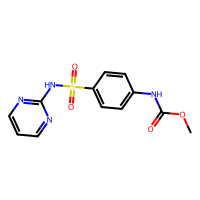

In [92]:
df

# Create a new library

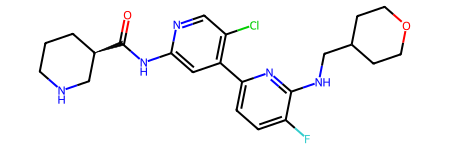

In [101]:
bki5=kinase_inhibitors['Molecule'][41]
bki5

In [102]:

bki5_smi =kinase_inhibitors['canonical_smiles'][41]
bki5_smi

'O=C(Nc1cc(-c2ccc(F)c(NCC3CCOCC3)n2)c(Cl)cn1)[C@@H]1CCCNC1'

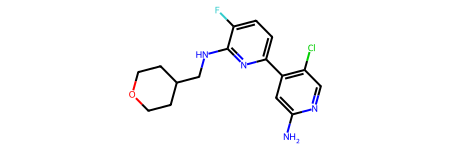

In [105]:
bki5_amine = Chem.MolFromSmiles('Nc1cc(-c2ccc(F)c(NCC3CCOCC3)n2)c(Cl)cn1')
bki5_amine

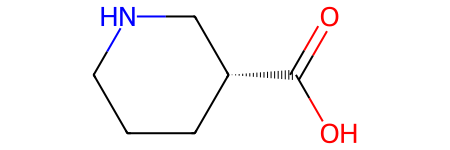

In [114]:
bki5_acid = Chem.MolFromSmiles('O=C(O)[C@@H]1CCCNC1')
bki5_acid

In [94]:
PubChem_amines = PandasTools.LoadSDF('PubChem_pubmed_text_aromatic amines_records.sdf', smilesName='SMILES', molColName='Molecule',
           includeFingerprints=True, removeHs=False, strictParsing=True)

[10:40:51] Explicit valence for atom # 0 Br, 3, is greater than permitted
[10:40:51] ERROR: Could not sanitize molecule ending on line 314152
[10:40:51] ERROR: Explicit valence for atom # 0 Br, 3, is greater than permitted
[10:41:10] Explicit valence for atom # 0 Cl, 3, is greater than permitted
[10:41:10] ERROR: Could not sanitize molecule ending on line 2694353
[10:41:10] ERROR: Explicit valence for atom # 0 Cl, 3, is greater than permitted
[10:41:13] Explicit valence for atom # 0 Cl, 3, is greater than permitted
[10:41:13] ERROR: Could not sanitize molecule ending on line 3093320
[10:41:13] ERROR: Explicit valence for atom # 0 Cl, 3, is greater than permitted
[10:41:13] Explicit valence for atom # 0 Br, 3, is greater than permitted
[10:41:13] ERROR: Could not sanitize molecule ending on line 3093507
[10:41:13] ERROR: Explicit valence for atom # 0 Br, 3, is greater than permitted


In [96]:
amine_df = PubChem_amines[['SMILES']]
amine_df.shape

(22670, 1)

In [109]:
PubChem_acids = PandasTools.LoadSDF('PubChem_pubmed_text_heterocyclic acids_records.sdf', smilesName='SMILES', molColName='Molecule',
           includeFingerprints=True, removeHs=False, strictParsing=True)

[12:28:15] Conflicting single bond directions around double bond at index 48.
[12:28:15]   BondStereo set to STEREONONE and single bond directions set to NONE.
[12:28:18] Explicit valence for atom # 0 Br, 3, is greater than permitted
[12:28:18] ERROR: Could not sanitize molecule ending on line 1124810
[12:28:18] ERROR: Explicit valence for atom # 0 Br, 3, is greater than permitted
[12:28:38] Conflicting single bond directions around double bond at index 48.
[12:28:38]   BondStereo set to STEREONONE and single bond directions set to NONE.


In [111]:
cooh_df = PubChem_acids[['SMILES']]
cooh_df.shape

(16768, 1)

In [112]:
#converts smiles to molecules and add molecule column to dataframe
PandasTools.AddMoleculeColumnToFrame(cooh_df, 'SMILES', 'Molecule', includeFingerprints=True)
cooh_df.head()


[12:31:37] WARNING: not removing hydrogen atom without neighbors
[12:31:38] WARNING: not removing hydrogen atom without neighbors
[12:31:38] WARNING: not removing hydrogen atom without neighbors
[12:31:38] WARNING: not removing hydrogen atom without neighbors
[12:31:38] WARNING: not removing hydrogen atom without neighbors
[12:31:38] WARNING: not removing hydrogen atom without neighbors
[12:31:38] WARNING: not removing hydrogen atom without neighbors
[12:31:38] WARNING: not removing hydrogen atom without neighbors
[12:31:38] WARNING: not removing hydrogen atom without neighbors
[12:31:38] WARNING: not removing hydrogen atom without neighbors
[12:31:38] WARNING: not removing hydrogen atom without neighbors
[12:31:39] WARNING: not removing hydrogen atom without neighbors
[12:31:39] WARNING: not removing hydrogen atom without neighbors
[12:31:39] WARNING: not removing hydrogen atom without neighbors
[12:31:45] WARNING: not removing hydrogen atom without neighbors
[12:31:45] WARNING: not r

,SMILES,Molecule
0,[H]c1c([H])c([N+](=O)[O-])c([H])c([N+](=O)[O-]...,<rdkit.Chem.rdchem.Mol object at 0x3fe7e86d0>
1,[H]OC1([H])C([H])(O[H])C([H])(O[H])C([H])(OP(=...,<rdkit.Chem.rdchem.Mol object at 0x3fe7e8820>
2,[H]OC1([H])C([H])([H])C([H])([H])C2([H])C3([H]...,<rdkit.Chem.rdchem.Mol object at 0x3fe7e8900>
3,[H]OC(=O)c1c([H])c([H])c([H])c(O[H])c1O[H],<rdkit.Chem.rdchem.Mol object at 0x3fe7e89e0>
4,[H]OC(=O)C(O[H])(C(=O)C([H])([H])[H])C([H])([H...,<rdkit.Chem.rdchem.Mol object at 0x3fe7e8ac0>


In [113]:
#converts smiles to molecules and add molecule column to dataframe
PandasTools.AddMoleculeColumnToFrame(amine_df, 'SMILES', 'Molecule', includeFingerprints=True)
amine_df.head()

[12:32:04] WARNING: not removing hydrogen atom without neighbors
[12:32:05] WARNING: not removing hydrogen atom without neighbors
[12:32:05] WARNING: not removing hydrogen atom without neighbors
[12:32:05] WARNING: not removing hydrogen atom without neighbors
[12:32:05] WARNING: not removing hydrogen atom without neighbors
[12:32:05] WARNING: not removing hydrogen atom without neighbors
[12:32:05] WARNING: not removing hydrogen atom without neighbors
[12:32:05] WARNING: not removing hydrogen atom without neighbors
[12:32:05] WARNING: not removing hydrogen atom without neighbors
[12:32:05] WARNING: not removing hydrogen atom without neighbors
[12:32:05] WARNING: not removing hydrogen atom without neighbors
[12:32:05] WARNING: not removing hydrogen atom without neighbors
[12:32:05] WARNING: not removing hydrogen atom without neighbors
[12:32:05] WARNING: not removing hydrogen atom without neighbors
[12:32:05] WARNING: not removing hydrogen atom without neighbors
[12:32:06] WARNING: not r

,SMILES,Molecule
0,[H]c1c([H])c([N+](=O)[O-])c([H])c([N+](=O)[O-]...,<rdkit.Chem.rdchem.Mol object at 0x400fd5af0>
1,[H]C([H])(Cl)C([H])([H])Cl,<rdkit.Chem.rdchem.Mol object at 0x400fd5e00>
2,[H]c1c([H])c(Cl)c(Cl)c([H])c1Cl,<rdkit.Chem.rdchem.Mol object at 0x400fd59a0>
3,[H]OC(=O)c1c([H])c([H])c([H])c(O[H])c1O[H],<rdkit.Chem.rdchem.Mol object at 0x400fd5930>
4,[H]OC(=O)C([H])(OP(=O)(O[H])O[H])C([H])([H])O[H],<rdkit.Chem.rdchem.Mol object at 0x400fd5cb0>


Morgan Fingerprint was used to rank acids by similarity to bki5_acid. 

In [120]:
bki5_acid_fp = np.array(AllChem.GetMorganFingerprintAsBitVect(bki5_acid,3,nBits=1024))

#similarity for acids
lst_acids = []
for mol in cooh_df["Molecule"]:
    try:
        acid_fp = np.array(AllChem.GetMorganFingerprintAsBitVect(mol,3,nBits=1024))
        sim = np.sum(bki5_acid_fp*acid_fp) / np.sqrt( np.sum(bki5_acid_fp)*np.sum(acid_fp) )
        mol_smiles = Chem.MolToSmiles(mol, isomericSmiles=True)
        lst_acids.append([mol_smiles, sim])
    except:
        continue
    
#sort by similarity
lst_acids.sort(key=lambda x:x[1], reverse=True)



In [135]:
lst_acids[:20]

[['O=C(O)C1CCCNC1', 1.0],
 ['O=C(O)[C@@H]1CCCNC1', 1.0],
 ['O=C(O)[C@H]1CCCNC1', 1.0],
 ['O=C(O)C1CNC1', 0.6851601597031488],
 ['O=C(O)C1CCNCC1', 0.59336610396393],
 ['O=C(O)C1CCCCC1', 0.5773502691896257],
 ['O=C(O)[C@@H]1CCC[NH2+]C1.[Cl-]', 0.5416666666666666],
 ['O=C(O)C1CCCN1', 0.5345224838248488],
 ['O=C(O)[C@H]1CCCN1', 0.5345224838248488],
 ['O=C(O)[C@@H]1CCCN1', 0.5345224838248488],
 ['CC(C)(C)OC(=O)N[C@H]1CCCNC1', 0.5298129428260175],
 ['O=C(O)[C@@H]1CCN1', 0.5103103630798288],
 ['O=C(O)C1CCN1', 0.5103103630798288],
 ['C1CNC1', 0.5],
 ['O=C(O)[C@@H]1CN1', 0.49099025303098287],
 ['NC1CCCC(C(=O)O)C1', 0.48989794855663565],
 ['O=C(O)CC1CCNC1', 0.48989794855663565],
 ['O=C(O)C1CCCNC1C(=O)O', 0.4714045207910317],
 ['O=C(O)[C@H]1CCCN[C@H]1C(=O)O', 0.4714045207910317],
 ['O=C(O)[C@H]1NCCC[C@H]1C(=O)O', 0.4714045207910317]]

In [139]:
top20_acids = lst_acids[3:20]
acid_df = pd.DataFrame(top20_acids, columns=['SMILES','similarity'])
PandasTools.AddMoleculeColumnToFrame(acid_df, 'SMILES', 'Molecule', includeFingerprints=True)
acid_df.head(15)

,SMILES,similarity,Molecule
0,O=C(O)C1CNC1,0.685160,<rdkit.Chem.rdchem.Mol object at 0x411566f10>
1,O=C(O)C1CCNCC1,0.593366,<rdkit.Chem.rdchem.Mol object at 0x411564270>
2,O=C(O)C1CCCCC1,0.577350,<rdkit.Chem.rdchem.Mol object at 0x411566ab0>
3,O=C(O)[C@@H]1CCC[NH2+]C1.[Cl-],0.541667,<rdkit.Chem.rdchem.Mol object at 0x411566dc0>
4,O=C(O)C1CCCN1,0.534522,<rdkit.Chem.rdchem.Mol object at 0x411566a40>
5,O=C(O)[C@H]1CCCN1,0.534522,<rdkit.Chem.rdchem.Mol object at 0x411566960>
6,O=C(O)[C@@H]1CCCN1,0.534522,<rdkit.Chem.rdchem.Mol object at 0x411566880>
7,CC(C)(C)OC(=O)N[C@H]1CCCNC1,0.529813,<rdkit.Chem.rdchem.Mol object at 0x4115667a0>
8,O=C(O)[C@@H]1CCN1,0.510310,<rdkit.Chem.rdchem.Mol object at 0x4115666c0>
9,O=C(O)C1CCN1,0.510310,<rdkit.Chem.rdchem.Mol object at 0x4115665e0>


,SMILES,similarity,Molecule
0,O=C(O)C1CNC1,0.685160,
1,O=C(O)C1CCNCC1,0.593366,
2,O=C(O)C1CCCCC1,0.577350,
3,O=C(O)[C@@H]1CCC[NH2+]C1.[Cl-],0.541667,
4,O=C(O)C1CCCN1,0.534522,
5,O=C(O)[C@H]1CCCN1,0.534522,
6,O=C(O)[C@@H]1CCCN1,0.534522,
7,CC(C)(C)OC(=O)N[C@H]1CCCNC1,0.529813,
8,O=C(O)[C@@H]1CCN1,0.510310,
9,O=C(O)C1CCN1,0.510310,

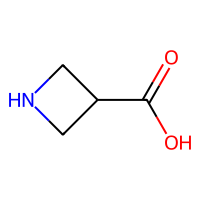
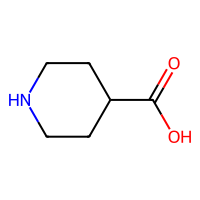
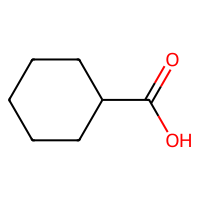
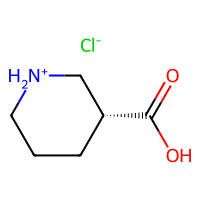
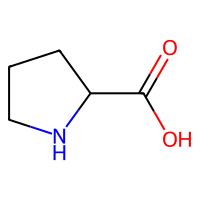
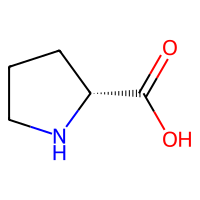
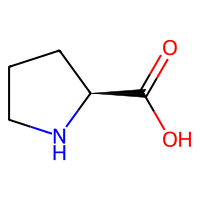
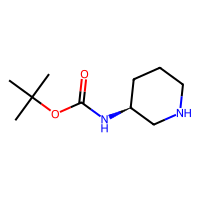
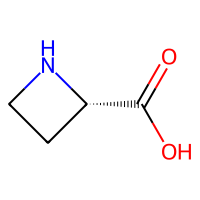
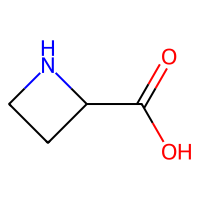
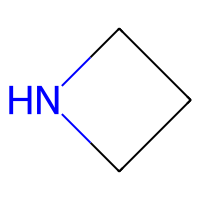
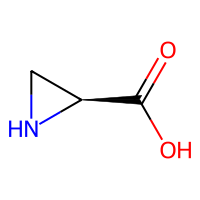
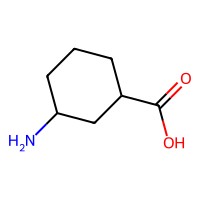
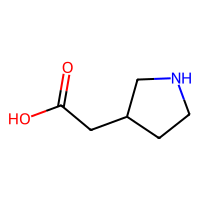
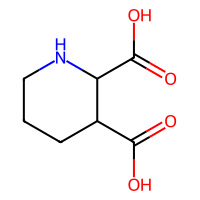
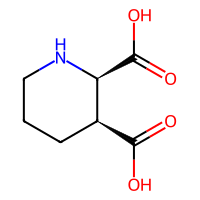
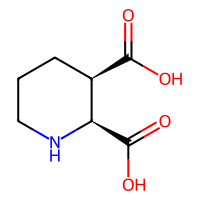

In [141]:
acid_df

Function to filter molecules uses a nested for loop to iterate through the new_list of molecules from the 'Molecule' column in the data frame and searches for presence of substructures in the given list of molecule parttens. A molecule is removed from the new_list during the iteration if there is a match with a substructure. 

Some of the substructures that can be added to the lists are given below.

problem groups1: acid halides, aldehyde, activated anhydride, Succinimidyl Esters
problen groups2: hydrazines, guanidinium, primary alcohol, pyrimidone

In [115]:
#Function to filter molecules

def filter_mols (df_mol, patt_list_mol):

    new_list = df_mol['Molecule'].tolist()
    for mol in new_list:
        for pattern in patt_list_mol:
            if mol.HasSubstructMatch(pattern):
                if mol in new_list:
                    new_list.remove(mol)
            
   
    # convert to smiles and back to keep only unique molecules
    new_list_smiles = list(Chem.MolToSmiles(mol, isomericSmiles=True) for mol in new_list)
    new_list_unique = list(Chem.MolFromSmiles(smiles) for smiles in set(new_list_smiles))

    return new_list_unique

In [142]:
#List of substructures to filter acid df
acid_prob_list = ['[CX3](=O)[O][CX3](=O)', '[CX3](=[OX1])[F,Cl,Br,I]', '[CX3H1](=O)[#6]'] 
acid_prob_mol = list(Chem.MolFromSmarts(smiles) for smiles in acid_prob_list)

new_cooh_list = filter_mols(acid_df, acid_prob_mol)
len(new_cooh_list)

17

In [143]:
#similarity for amines
bki5_amine_fp = np.array(AllChem.GetMorganFingerprintAsBitVect(bki5_amine,3,nBits=1024))

lst_amines = []
for mol in amine_df["Molecule"]:
    try:
        amine_fp = np.array(AllChem.GetMorganFingerprintAsBitVect(mol,3,nBits=1024))
        sim = np.sum(bki5_amine_fp*amine_fp) / np.sqrt( np.sum(bki5_amine_fp)*np.sum(amine_fp) )
        mol_smiles = Chem.MolToSmiles(mol, isomericSmiles=True)
        lst_amines.append([mol_smiles, sim])
    except:
        continue
    
#sort by similarity
lst_amines.sort(key=lambda x:x[1], reverse=True)

In [144]:
lst_amines[:20]

[['Nc1ncc(C#Cc2cccc(NC(=O)NCC3CCOCC3)c2)cn1', 0.39425512071908414],
 ['Nc1cc(Cl)ccn1', 0.39069919580296747],
 ['Nc1cc(N)nc(CCN2CCC(Oc3ccc(Cl)c(Cl)c3)CC2)n1', 0.3591627316465865],
 ['O=C(O)Cc1nc(NC(=O)C(Oc2ccc(Cl)cc2)c2ccc(S(=O)(=O)C3CCOCC3)cc2)sc1Cl',
  0.34452955544363373],
 ['CSc1ccccc1NC(=O)COC(=O)c1cc(Cl)cc(Cl)c1N', 0.3441282785273711],
 ['CN(CC1CCOCC1)c1ccc(-c2nc(Cc3ccc(F)cc3)no2)cn1', 0.3431724460746192],
 ['O=C(NC1CC1)C(c1ccc(F)cc1)N1CCN(S(=O)(=O)c2ccc(Cl)cc2)CC1',
  0.33596597197983935],
 ['CCOC(=O)c1c(-c2ccc(F)cc2)cc(-c2ccccc2)nc1Nc1ccc(Cl)cc1',
  0.3334734482337345],
 ['O=C(COc1ccc(Cl)cc1Cl)Nc1ccc(N2CCN(C(=O)c3cc4ccccc4o3)CC2)cc1',
  0.33127841869580166],
 ['CCn1nc(C)c(C(=O)Nc2c(C(N)=O)sc3nc(C(F)F)cc(-c4ccc(C)s4)c23)c1C',
  0.3298832728995219],
 ['O=C(CN1CCC[C@@H]1c1ccc2c(c1)OCCCO2)Nc1cc(Cl)ccc1F', 0.3288735941548434],
 ['Fc1ccc(F)c(NCSc2nnc(C34CC5CC(CC(C5)C3)C4)o2)c1', 0.3284860840488542],
 ['O=C(Nc1cccc(Cc2cc(Cl)ccc2OCc2ccccc2)n1)C1CCOCC1', 0.32781501882489184],
 ['O=C(COC(

,SMILES,similarity,Molecule
0,Nc1ncc(C#Cc2cccc(NC(=O)NCC3CCOCC3)c2)cn1,0.394255,
1,Nc1cc(Cl)ccn1,0.390699,
2,Nc1cc(N)nc(CCN2CCC(Oc3ccc(Cl)c(Cl)c3)CC2)n1,0.359163,
3,O=C(O)Cc1nc(NC(=O)C(Oc2ccc(Cl)cc2)c2ccc(S(=O)(...,0.344530,
4,CSc1ccccc1NC(=O)COC(=O)c1cc(Cl)cc(Cl)c1N,0.344128,
5,CN(CC1CCOCC1)c1ccc(-c2nc(Cc3ccc(F)cc3)no2)cn1,0.343172,
6,O=C(NC1CC1)C(c1ccc(F)cc1)N1CCN(S(=O)(=O)c2ccc(...,0.335966,
7,CCOC(=O)c1c(-c2ccc(F)cc2)cc(-c2ccccc2)nc1Nc1cc...,0.333473,
8,O=C(COc1ccc(Cl)cc1Cl)Nc1ccc(N2CCN(C(=O)c3cc4cc...,0.331278,
9,CCn1nc(C)c(C(=O)Nc2c(C(N)=O)sc3nc(C(F)F)cc(-c4...,0.329883,

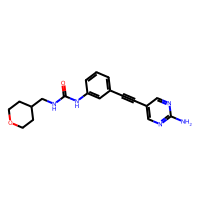
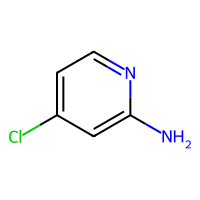
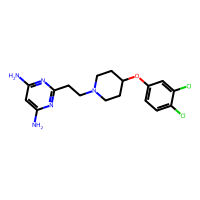
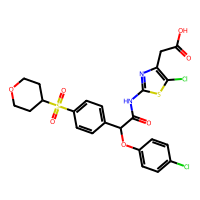
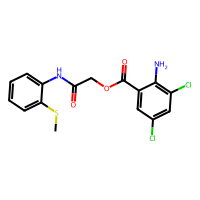
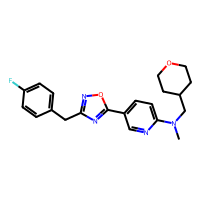
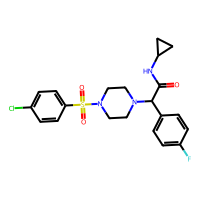
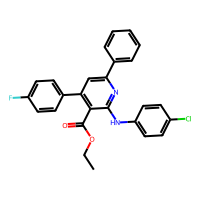
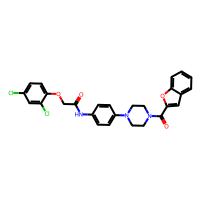
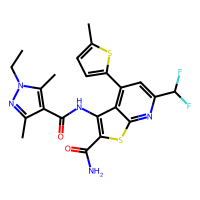
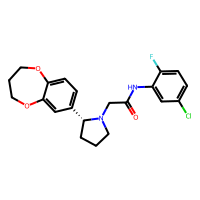
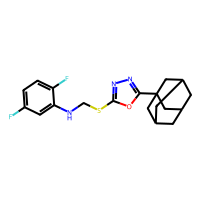
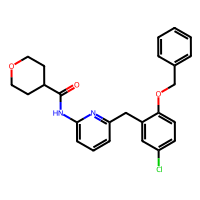
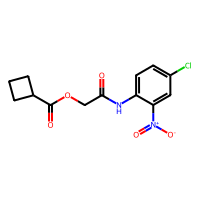
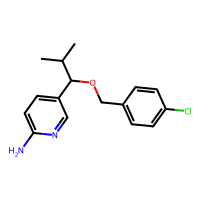
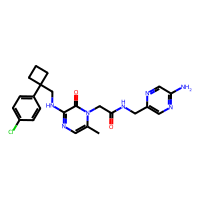
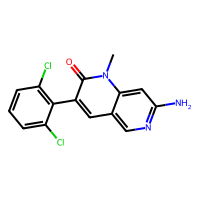
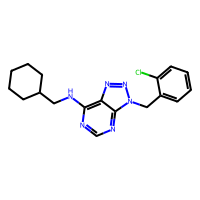
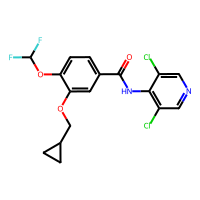
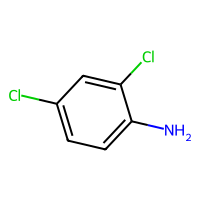

In [146]:
top20_amines = lst_amines[:20]
amine_df = pd.DataFrame(top20_amines, columns=['SMILES','similarity'])
PandasTools.AddMoleculeColumnToFrame(amine_df, 'SMILES', 'Molecule', includeFingerprints=True)
amine_df

In [147]:
#List of substructures to filter amine df
amine_prob_list = ['[NX3][NX2]=[*]', 'CNC(N)=N', '[#6][OX2H]']
amine_prob_mol = list(Chem.MolFromSmarts(smiles) for smiles in amine_prob_list)

new_amine_list = filter_mols(amine_df, amine_prob_mol)
len(new_amine_list)

19

In [150]:
new_amine_list

In [171]:
#Function for amide coupling
def run_amide_coupling (acid_smi, amine_smi):
    amine = Chem.MolFromSmiles(amine_smi)
    acid = Chem.MolFromSmiles(acid_smi)
    rxn_smarts = '[C:1](=[O:2])-[OD1].[N!H0:3]>>[C:1](=[O:2])[N:3]'
    rxn = AllChem.ReactionFromSmarts(rxn_smarts)
    product = rxn.RunReactants((acid, amine))[0][0]
    Chem.SanitizeMol(product)
    all_three = [amine, acid, product]
    all_three_smiles = [Chem.MolToSmiles(mol, isomericSmiles=True) for mol in all_three]
    return all_three_smiles
  
    run_amide_coupling('CC(=O)O', 'NC')

In [172]:
len(top20_acids)

17

In [176]:
#running 17X19 reactions
amides_list = []
for acid_sml in top20_acids[:15]:
    for amine_sml in top20_amines[:15]:
        try:
            amides_list.append(run_amide_coupling(acid_sml[0], amine_sml[0]))
        except:
            continue


        

In [177]:
amides_list[:2]

[['Nc1ncc(C#Cc2cccc(NC(=O)NCC3CCOCC3)c2)cn1',
  'O=C(O)C1CNC1',
  'O=C(NCC1CCOCC1)Nc1cccc(C#Cc2cnc(NC(=O)C3CNC3)nc2)c1'],
 ['Nc1cc(Cl)ccn1', 'O=C(O)C1CNC1', 'O=C(Nc1cc(Cl)ccn1)C1CNC1']]

In [178]:
len(amides_list)

182

In [179]:
#generating data frame
amides_df = pd.DataFrame(amides_list, columns = ['amine', 'acid', 'product'])

In [180]:
amides_df.head()

,amine,acid,product
0,Nc1ncc(C#Cc2cccc(NC(=O)NCC3CCOCC3)c2)cn1,O=C(O)C1CNC1,O=C(NCC1CCOCC1)Nc1cccc(C#Cc2cnc(NC(=O)C3CNC3)n...
1,Nc1cc(Cl)ccn1,O=C(O)C1CNC1,O=C(Nc1cc(Cl)ccn1)C1CNC1
2,Nc1cc(N)nc(CCN2CCC(Oc3ccc(Cl)c(Cl)c3)CC2)n1,O=C(O)C1CNC1,Nc1cc(NC(=O)C2CNC2)nc(CCN2CCC(Oc3ccc(Cl)c(Cl)c...
3,O=C(O)Cc1nc(NC(=O)C(Oc2ccc(Cl)cc2)c2ccc(S(=O)(...,O=C(O)C1CNC1,O=C(O)Cc1nc(N(C(=O)C2CNC2)C(=O)C(Oc2ccc(Cl)cc2...
4,CSc1ccccc1NC(=O)COC(=O)c1cc(Cl)cc(Cl)c1N,O=C(O)C1CNC1,CSc1ccccc1N(C(=O)COC(=O)c1cc(Cl)cc(Cl)c1N)C(=O...


In [181]:
#convert amides_list smiles to molecules
amide_mol_list = []
for lst in amides_list:
    mol_lst = []
    for smiles in lst:
        mol=Chem.MolFromSmiles(smiles)
        mol_lst.append(mol)
    amide_mol_list.append(mol_lst) 

In [182]:
len(amide_mol_list)

182

In [183]:
amide_mol_list[:1]

[[<rdkit.Chem.rdchem.Mol at 0x40a4f1850>,

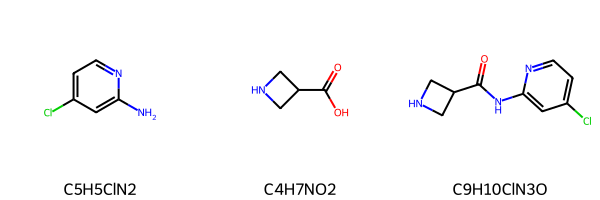

In [184]:

formulae = [rdMolDescriptors.CalcMolFormula(mol) for mol in amide_mol_list[1]]
Draw.MolsToGridImage(amide_mol_list[1], legends = formulae)

In [185]:
len(amide_mol_list[1][0].GetSubstructMatches(Chem.MolFromSmarts('C(=O)N')))

0

In [186]:
len(amide_mol_list[1][1].GetSubstructMatches(Chem.MolFromSmarts('C(=O)N')))

0

In [187]:
len(amide_mol_list[1][2].GetSubstructMatches(Chem.MolFromSmarts('C(=O)N')))

1

In [188]:
# Function testing amide formation takes in a list of [amine, acid, product] lists of molecules
def test_amide_formation(mol_lst):
    amide_bond = Chem.MolFromSmarts('C(=O)N')
    for lst in mol_lst:
        bb_amidebonds = len(lst[0].GetSubstructMatches(amide_bond)) + len(lst[1].GetSubstructMatches(amide_bond))
        if bb_amidebonds < len(lst[2].GetSubstructMatches(amide_bond)):
            print("New bond")
        else:
            print("Reaction Failed.")
    

        
        

# New Library

,amine,acid,product,Molecule
0,Nc1ncc(C#Cc2cccc(NC(=O)NCC3CCOCC3)c2)cn1,O=C(O)C1CNC1,O=C(NCC1CCOCC1)Nc1cccc(C#Cc2cnc(NC(=O)C3CNC3)n...,
1,Nc1cc(Cl)ccn1,O=C(O)C1CNC1,O=C(Nc1cc(Cl)ccn1)C1CNC1,
2,Nc1cc(N)nc(CCN2CCC(Oc3ccc(Cl)c(Cl)c3)CC2)n1,O=C(O)C1CNC1,Nc1cc(NC(=O)C2CNC2)nc(CCN2CCC(Oc3ccc(Cl)c(Cl)c...,
3,O=C(O)Cc1nc(NC(=O)C(Oc2ccc(Cl)cc2)c2ccc(S(=O)(...,O=C(O)C1CNC1,O=C(O)Cc1nc(N(C(=O)C2CNC2)C(=O)C(Oc2ccc(Cl)cc2...,
4,CSc1ccccc1NC(=O)COC(=O)c1cc(Cl)cc(Cl)c1N,O=C(O)C1CNC1,CSc1ccccc1N(C(=O)COC(=O)c1cc(Cl)cc(Cl)c1N)C(=O...,
...,...,...,...,...
177,O=C(CN1CCC[C@@H]1c1ccc2c(c1)OCCCO2)Nc1cc(Cl)ccc1F,O=C(O)C1CCCNC1C(=O)O,O=C(O)C1NCCCC1C(=O)N(C(=O)CN1CCC[C@@H]1c1ccc2c...,
178,Fc1ccc(F)c(NCSc2nnc(C34CC5CC(CC(C5)C3)C4)o2)c1,O=C(O)C1CCCNC1C(=O)O,O=C(O)C1NCCCC1C(=O)N(CSc1nnc(C23CC4CC(CC(C4)C2...,
179,O=C(Nc1cccc(Cc2cc(Cl)ccc2OCc2ccccc2)n1)C1CCOCC1,O=C(O)C1CCCNC1C(=O)O,O=C(O)C1NCCCC1C(=O)N(C(=O)C1CCOCC1)c1cccc(Cc2c...,
180,O=C(COC(=O)C1CCC1)Nc1ccc(Cl)cc1[N+](=O)[O-],O=C(O)C1CCCNC1C(=O)O,O=C(OCC(=O)N(C(=O)C1CCCNC1C(=O)O)c1ccc(Cl)cc1[...,

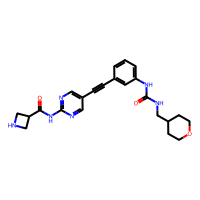
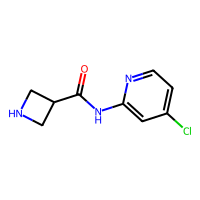
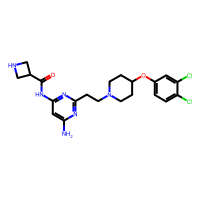
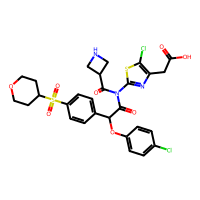
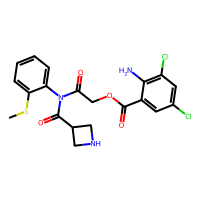
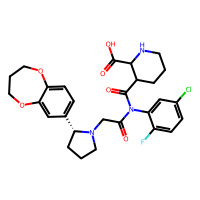
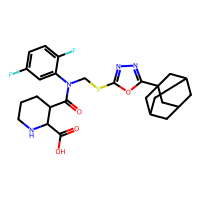
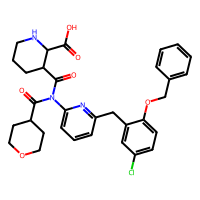
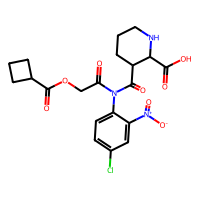
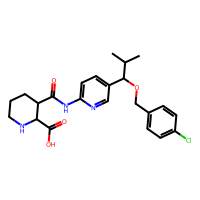

In [199]:

PandasTools.AddMoleculeColumnToFrame(amides_df, 'product', 'Molecule', includeFingerprints=True)
amides_df